# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

# Read the csv file

In [2]:
fraud = pd.read_csv('fraud_data.csv')

In [3]:
#check details about the data set
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21693 entries, 0 to 21692
Data columns (total 30 columns):
V1        21693 non-null float64
V2        21693 non-null float64
V3        21693 non-null float64
V4        21693 non-null float64
V5        21693 non-null float64
V6        21693 non-null float64
V7        21693 non-null float64
V8        21693 non-null float64
V9        21693 non-null float64
V10       21693 non-null float64
V11       21693 non-null float64
V12       21693 non-null float64
V13       21693 non-null float64
V14       21693 non-null float64
V15       21693 non-null float64
V16       21693 non-null float64
V17       21693 non-null float64
V18       21693 non-null float64
V19       21693 non-null float64
V20       21693 non-null float64
V21       21693 non-null float64
V22       21693 non-null float64
V23       21693 non-null float64
V24       21693 non-null float64
V25       21693 non-null float64
V26       21693 non-null float64
V27       21693 non-null float64


In [4]:
#There are 30 columns with 21693 rows of which are flaot data type except the Class column which is int; 
#the the target variable

In [5]:
#check the first few observations in the data
pd.set_option('display.max_columns', None)
fraud.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,1.535776,1.019947,-0.096511,0.573023,0.215214,0.265249,-0.612064,0.093821,-0.064890,-0.137258,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,-0.007688,-1.087403,-0.720270,0.855185,-1.070011,-0.869661,0.395302,0.635695,0.249401,1.341809,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00,0
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,0.726218,0.347648,-0.806752,0.531268,-0.806538,0.154996,-0.319935,-0.335550,-0.648994,-0.232185,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00,0
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,-1.027847,-3.220699,3.007008,0.794679,-1.504351,-0.380985,0.667344,0.676138,-0.419469,0.348269,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10,0
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,0.148566,-0.474103,-0.011319,-0.410223,1.648979,0.218394,-0.239475,0.422933,1.274986,0.402329,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67,0


In [6]:
# Statistical Analysis of the data
fraud.describe(include='all')

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000
mean,-0.032403,0.047565,-0.091623,0.057805,-0.033983,-0.023207,-0.074203,0.002096,-0.044311,-0.091073,0.067173,-0.094268,-0.000667,-0.091499,-0.003917,-0.055079,-0.098357,-0.033488,0.021861,-0.001762,0.012471,0.003743,-0.001662,-0.002446,-0.000406,0.002367,0.001514,0.003203,86.776247,0.016411
std,2.106997,1.690911,1.870289,1.540329,1.530508,1.340599,1.596775,1.412650,1.158554,1.354886,1.154227,1.364933,0.989655,1.356199,0.916582,1.096472,1.424975,0.936769,0.843902,0.727979,0.850009,0.741348,0.629987,0.600144,0.520949,0.478279,0.424688,0.302048,235.644479,0.127052
min,-41.928738,-40.803981,-31.103685,-4.848504,-32.092129,-20.367836,-41.506796,-38.987263,-13.434066,-24.403185,-3.995739,-18.553697,-3.844974,-19.214325,-4.498945,-14.129855,-24.019099,-9.498746,-4.395283,-21.024817,-21.453736,-8.887017,-21.303666,-2.766638,-4.541819,-1.855355,-7.764147,-6.520075,0.000000,0.000000
25%,-0.929371,-0.592921,-0.962975,-0.850069,-0.698296,-0.779041,-0.565297,-0.205943,-0.669752,-0.554596,-0.739193,-0.438730,-0.634030,-0.438416,-0.582193,-0.492689,-0.498984,-0.513216,-0.444441,-0.209710,-0.225142,-0.538258,-0.162395,-0.356356,-0.317296,-0.326141,-0.069938,-0.053334,5.370000,0.000000
50%,0.007545,0.075215,0.176534,-0.012868,-0.063948,-0.281565,0.030859,0.023159,-0.073996,-0.099291,0.005596,0.126666,-0.018642,0.044870,0.048753,0.059504,-0.075797,-0.019269,0.021719,-0.057330,-0.024133,0.007273,-0.012327,0.036878,0.011561,-0.044870,0.002475,0.011765,21.950000,0.000000
75%,1.315678,0.819749,1.020809,0.772388,0.615287,0.383633,0.563751,0.328411,0.590212,0.445474,0.786044,0.613676,0.652241,0.490003,0.642463,0.525327,0.389992,0.494700,0.484930,0.139059,0.192954,0.530333,0.146616,0.431931,0.354043,0.238629,0.095859,0.081749,76.480000,0.000000
max,2.451888,21.467203,4.069865,12.114672,29.162172,21.393069,34.303177,20.007208,9.125535,12.701538,12.018913,3.966626,4.099352,6.441021,5.720479,6.442798,6.609366,3.790316,4.851255,13.119819,27.202839,8.361985,15.626067,4.014444,5.541598,3.463246,9.879903,9.876371,7712.430000,1.000000


In [7]:
#Checking null values
fraud.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# There is no null value in the dataset

In [9]:
# Checking for duplicate values
fraud.duplicated().sum()

143

In [10]:
# There are 143 duplicated values to be dropped

In [11]:
# Dropping the duplicates while keeping the first occurence and
fraud.drop_duplicates(keep='first', inplace=True)

In [12]:
fraud.duplicated().sum()

0

In [13]:
fraud.shape

(21550, 30)

In [14]:
fraud.Class.value_counts()

0    21204
1      346
Name: Class, dtype: int64

In [15]:
# As seen above this is an imbalance data with just 346 fraud cases out of 21550 total transactions

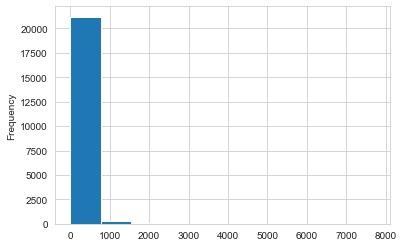

In [16]:
fraud['Amount'].plot(kind='hist')

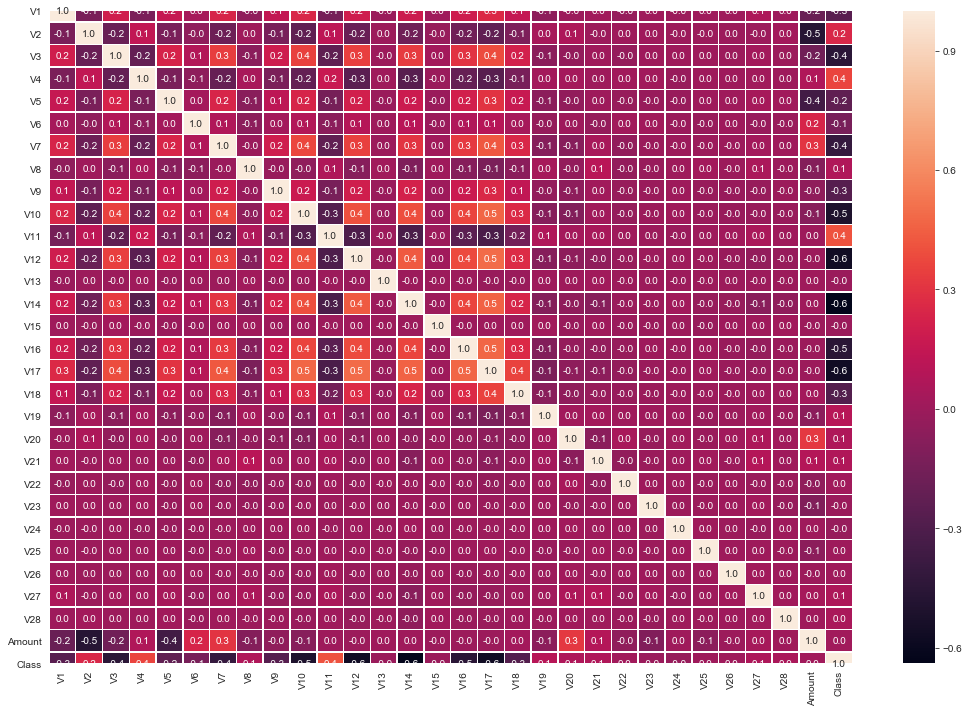

In [17]:
f,ax=plt.subplots(figsize=(18,12))
sns.heatmap(fraud.corr(),annot=True,linewidth=.5,fmt='.1f',ax=ax)
plt.show()

In [18]:
X = fraud.drop(['Class'], axis=1)
y = fraud.Class

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
4420,-0.549661,-0.318216,-0.454299,-2.738805,1.615356,1.096961,0.686688,0.496484,0.703111,-1.420887,0.043539,0.039633,-1.967973,0.484585,-1.219556,-0.757860,-0.067171,-0.888771,-1.230995,-0.263392,0.369474,1.080352,-0.047033,-0.896342,-0.503328,0.649749,0.108960,0.169252,65.10
1801,-2.852918,-8.078339,-4.238958,2.634421,-2.372357,-0.325647,3.790409,-1.064451,0.038315,-1.064688,-0.680776,0.595440,0.615493,0.952911,0.209619,-0.070554,-0.105378,-0.384206,-0.803307,4.950307,1.424039,-1.502738,-2.057312,0.146545,-0.932034,-0.045874,-0.550519,0.376198,2549.00
7224,-3.419188,-2.026462,-1.507912,-0.895527,-2.561974,3.319588,3.137491,-1.156004,1.045842,2.462194,0.887117,-0.489248,-0.841422,-1.251338,0.388374,-1.734793,-0.148292,-0.150307,-0.577783,-2.904052,-1.586334,-1.047005,0.365648,-1.607278,-1.199722,0.054853,-2.149951,0.856058,647.38
20340,-0.112836,-0.711381,0.382146,-3.615175,1.643598,3.306478,-0.705411,0.677779,-2.238458,1.039526,-0.380501,-1.366907,0.357539,-0.583658,0.273785,0.206999,-0.449842,0.431083,-0.431024,-0.146145,-0.356539,-0.735055,0.007142,0.932434,-0.387764,-0.628358,-0.016036,-0.080708,10.00
2392,1.948561,-0.530408,-0.327914,0.290380,-0.597855,0.110880,-0.827718,0.195481,1.032553,0.176853,0.683839,0.872474,-0.201526,-0.021894,-0.282091,0.542547,-0.727222,0.546566,0.021249,-0.166110,0.207618,0.730648,0.194229,0.813850,-0.307524,0.513357,-0.029960,-0.049713,11.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11326,0.971560,-0.406152,0.958895,0.576502,-0.064680,1.965807,-0.885168,0.647556,0.823617,-0.464336,0.029921,1.087510,0.771131,-0.448500,1.238262,-1.029458,0.857658,-2.147546,-1.468941,-0.126796,0.028035,0.406071,0.083490,-1.252695,0.003249,0.462116,0.087832,0.014933,34.33
12012,-1.696894,1.655182,0.208533,-0.523985,-1.640357,0.238927,-0.870259,-1.895885,-0.253909,-1.985756,-0.415323,0.348264,-0.805899,1.571236,2.630219,-1.162261,1.225621,0.217518,1.807818,0.445927,-1.015873,1.046120,-0.021348,0.083352,0.373525,-0.297784,-0.196786,-0.054041,129.96
5406,1.145723,-0.138743,0.935665,0.213245,-0.741670,-0.169951,-0.656526,0.106876,1.555752,-0.376996,2.634339,-1.865861,1.011905,1.839054,0.186884,0.362021,0.432131,0.214071,-0.544358,-0.148855,0.018794,0.280618,0.034849,0.236311,0.055459,1.032465,-0.080719,-0.006971,15.95
860,-0.407428,0.819890,0.257602,0.371708,2.392176,3.869325,0.234941,0.889302,-1.143551,-0.041770,-0.110414,-0.386750,0.052934,0.514312,1.873885,-0.245739,-0.287915,0.497274,1.885534,0.397243,-0.136634,-0.605978,-0.139050,0.979219,0.343449,-0.238021,0.090831,0.086881,49.99


In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lr = LogisticRegression(n_jobs=-1)

In [23]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
lr.score(X_train, y_train)

0.9963291314586508

In [25]:
y_pred = lr.predict(X_train)
pred = lr.predict(X_test)

In [26]:
lr.score(X_test, y_test)

0.9967660292463442

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
target_names = ['class 0', 'class 1']
print('*************** Classification report on training set ********************')
print(classification_report(y_train, y_pred, target_names=target_names))
print('*************** Confusion matrix on training set ********************')
print(confusion_matrix(y_train, y_pred))

print(' _' *50)
from sklearn.metrics import classification_report, confusion_matrix
print('*************** Classification report on test set ********************')
print(classification_report(y_test, pred, target_names=target_names))
print('*************** Classification report on test set ********************')
print(confusion_matrix(y_test, pred))

*************** Classification report on training set ********************
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     14204
     class 1       0.97      0.80      0.88       234

    accuracy                           1.00     14438
   macro avg       0.98      0.90      0.94     14438
weighted avg       1.00      1.00      1.00     14438

*************** Confusion matrix on training set ********************
[[14198     6]
 [   47   187]]
 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
*************** Classification report on test set ********************
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      7000
     class 1       0.97      0.82      0.89       112

    accuracy                           1.00      7112
   macro avg       0.98      0.91      0.94      7112
weighted avg       1.00      1.00      1.00      7112

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [29]:
y_pred = dt.predict(X_train)
pred = dt.predict(X_test)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
target_names = ['class 0', 'class 1']
print('*************** Classification report on training set ********************')
print(classification_report(y_train, y_pred, target_names=target_names))
print('*************** Confusion matrix on training set ********************')
print(confusion_matrix(y_train, y_pred))

print(' _' *50)
from sklearn.metrics import classification_report, confusion_matrix
print('*************** Classification report on test set ********************')
print(classification_report(y_test, pred, target_names=target_names))
print('*************** Confusion matrix on test set ********************')
print(confusion_matrix(y_test, pred))

*************** Classification report on training set ********************
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     14204
     class 1       1.00      1.00      1.00       234

    accuracy                           1.00     14438
   macro avg       1.00      1.00      1.00     14438
weighted avg       1.00      1.00      1.00     14438

*************** Confusion matrix on training set ********************
[[14204     0]
 [    0   234]]
 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
*************** Classification report on test set ********************
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      7000
     class 1       0.79      0.79      0.79       112

    accuracy                           0.99      7112
   macro avg       0.89      0.90      0.89      7112
weighted avg       0.99      0.99      0.99      7112

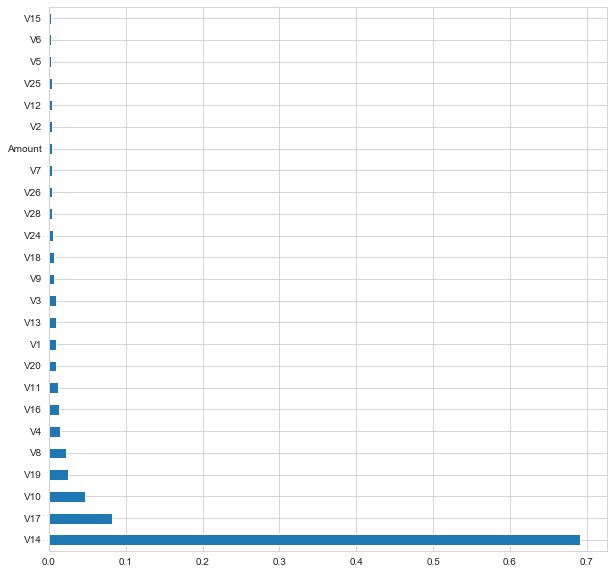

In [31]:
#Model 1: Decision trees
add_importances = pd.Series(dt.feature_importances_, index= X.columns)
add_importances.nlargest(25).plot(kind= "barh", figsize=(10,10))

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [33]:
y_pre = rf.predict(X_train)
pre = rf.predict(X_test)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
target_names = ['class 0', 'class 1']
print('*************** Classification report on training set ********************')
print(classification_report(y_train, y_pre, target_names=target_names))
print('*************** Confusion matrix on training set ********************')
print(confusion_matrix(y_train, y_pre))

print(' _' *50)
from sklearn.metrics import classification_report, confusion_matrix
print('*************** Classification report on test set ********************')
print(classification_report(y_test, pre, target_names=target_names))
print('*************** Confusion matrix on test set ********************')
print(confusion_matrix(y_test, pre))

*************** Classification report on training set ********************
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     14204
     class 1       1.00      0.94      0.97       234

    accuracy                           1.00     14438
   macro avg       1.00      0.97      0.98     14438
weighted avg       1.00      1.00      1.00     14438

*************** Confusion matrix on training set ********************
[[14204     0]
 [   15   219]]
 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
*************** Classification report on test set ********************
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      7000
     class 1       0.97      0.81      0.88       112

    accuracy                           1.00      7112
   macro avg       0.98      0.91      0.94      7112
weighted avg       1.00      1.00      1.00      7112

In [35]:
# Breaking the data into fraud and genuine transactions
fraud_data = fraud[fraud['Class']==1]
genuine_data = fraud[fraud['Class']==0]

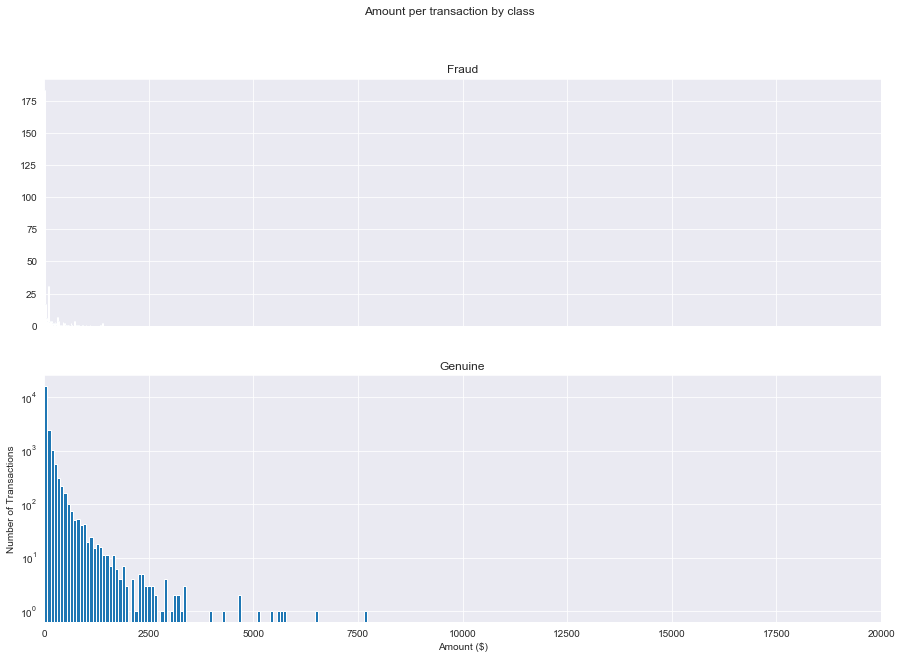

In [36]:
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15, 10))
f.suptitle('Amount per transaction by class')

ax1.hist(fraud_data.Amount, 100)
ax1.set_title('Fraud')
ax2.hist(genuine_data.Amount, 100)
ax2.set_title('Genuine')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

In [37]:
# The fraudulent amounts are very small and look skewed, we need to normalize the amount

In [38]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
fraud['Amount'] = std.fit_transform(np.array(fraud['Amount']).reshape(-1,1))

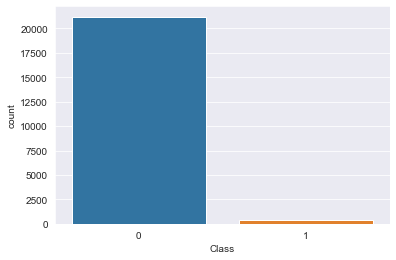

In [39]:
sns.countplot('Class', data=fraud)

In [36]:
X = fraud.drop(['Class'], axis=1)
y = fraud.Class

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Resampling with SMOTE

#### Synthetic Minority Oversampling Technique (SMOTE)

SMOTE technique generates new synthetic minority class data which is used to train the model. It selects minority class data points that are close in the feature space and draws a line between the selected data points. A new sample is generated at a point along this line. This procedure is used to create the required number of synthetic samples of the minority class. This approach is effective because new synthetic samples from the minority class are relatively close in feature space to existing minority class data.

In [42]:
# from imblearn.over_sampling import SMOTE
# X_resampled, y_resampled = SMOTE().fit_sample(X_train, y_train)

In [43]:
# WE are not resampling since tree based model are good in dealing with imbalance data

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
lr = LogisticRegression(n_jobs=-1)

In [46]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
lr.score(X_train, y_train)

0.9963291314586508

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [49]:
y_pred = dt.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
print('Accuracy:', accuracy_score(y_test, y_pred))
print('f1_score:', f1_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9928290213723284
f1_score: 0.7792207792207791
Precision: 0.7563025210084033
Recall: 0.8035714285714286
[[6971   29]
 [  22   90]]


In [51]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
pre = lr.predict(X_test)
print('Accuracy:', accuracy_score(y_test, pre))
print('f1_score:', f1_score(y_test, pre))
print('Precision:', precision_score(y_test, pre))
print('Recall:', recall_score(y_test, pre))
print(confusion_matrix(y_test, pre))

Accuracy: 0.9963442069741283
f1_score: 0.8761904761904763
Precision: 0.9387755102040817
Recall: 0.8214285714285714
[[6994    6]
 [  20   92]]


In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=800, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [53]:
p = rf.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
pre = lr.predict(X_test)
print('Accuracy:', accuracy_score(y_test, p))
print('f1_score:', f1_score(y_test, p))
print('Precision:', precision_score(y_test, p))
print('Recall:', recall_score(y_test, p))
print(confusion_matrix(y_test, p))

Accuracy: 0.9969066366704162
f1_score: 0.8942307692307694
Precision: 0.96875
Recall: 0.8303571428571429
[[6997    3]
 [  19   93]]


# NEXT?

* **Hyperparamter tuning**
* Then?
* Then??

In [55]:
from catboost import CatBoostClassifier

In [56]:
# # Model

# from sklearn.model_selection import RandomizedSearchCV

# model = CatBoostClassifier(eval_metric='AUC',
#                            random_seed = 1020,
#                            bagging_temperature = 0.2,
#                            od_type='Iter',
#                            metric_period = 50,
#                            od_wait=100)

# parameters= {
#                'learning_rate':[0.02],
#                'max_depth': [15],
#                'iterations': [300]
#                 }

# clf = RandomizedSearchCV(model, parameters, random_state=0, cv=5, scoring='accuracy')

# clf.fit(X_train, y_train, verbose=True)

# preds = clf.predict(X_test)

In [69]:
clf = CatBoostClassifier(
    iterations=800, 
    learning_rate=0.1,
#     max_depth = 15,
    loss_function='CrossEntropy'
)


clf.fit(X_train, y_train, 
        eval_set=(X_test, y_test), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 800, 'learning_rate': 0.1, 'loss_function': 'CrossEntropy'}


In [70]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, clf.predict(X_test))

0.9239642857142857

In [71]:
f1_score(y_test, clf.predict(X_test))

0.9090909090909091

In [65]:
confusion_matrix(y_test, clf.predict(X_test))

array([[6998,    2],
       [  17,   95]], dtype=int64)

In [28]:
from lightgbm import LGBMClassifier

In [64]:
y.isnull().sum()

0

In [79]:
# split train into 5 folds and apply random forest and check accuracy of each fold

from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import StratifiedKFold,KFold
from lightgbm                         import LGBMClassifier
from catboost                         import CatBoostClassifier

rf = LGBMClassifier(learning_rate=0.01,
                    boosting_type='gbdt', max_depth=9,  objective='binary', 
                    random_state=100,  
                  n_estimators=1000 ,reg_alpha=0, reg_lambda=1, n_jobs=-1)

# # all blank values replace with mode 
# for column in df.columns:
#     df[column].fillna(df[column].mode()[0], inplace=True)

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=10)
acc = []

for fold,(t_id,v_id) in enumerate(kf.split(X,y)):
    tx = X.iloc[t_id]; ty = y.iloc[t_id]
    vx = X.iloc[v_id]; vy = y.iloc[v_id]
    rf.fit(tx,ty, 
#            categorical_feature = categorical_features
#            cat_features = categorical_features
          )
           
    val_y = rf.predict(vx)
    f1_scor = f1_score(vy,val_y)
    acc.append(f1_scor)
    print(f"fold {fold} fscore {f1_scor}")

print(f"Mean f score {np.mean(f1_scor)}")


fold 0 fscore 0.8571428571428572
fold 1 fscore 0.923076923076923
fold 2 fscore 0.8976377952755905
fold 3 fscore 0.8799999999999999
fold 4 fscore 0.8976377952755905
Mean f score 0.8976377952755905


In [77]:
# Cross validation does not improve f1 score